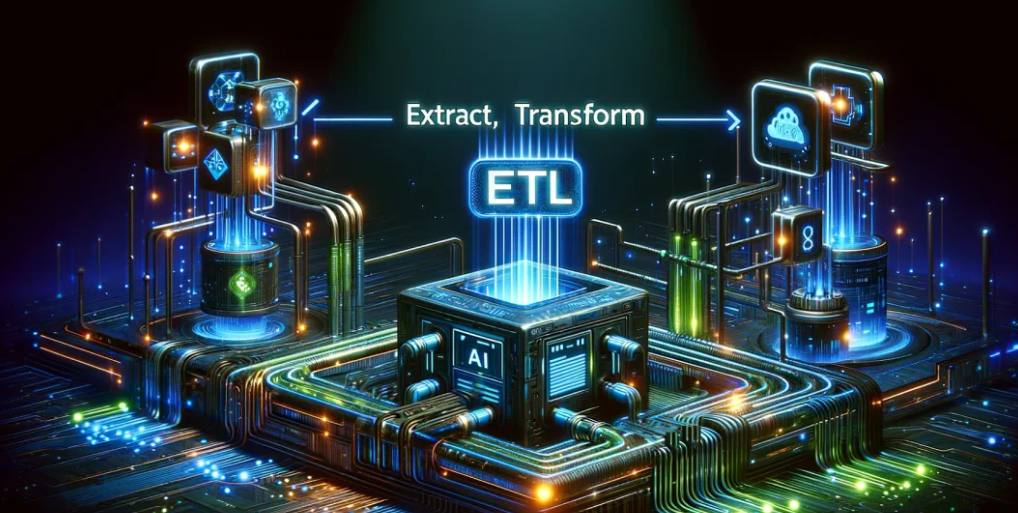

#### En esta etapa busco disponibilizar los datos para cumplir con los dos KPI´s que me han solicitado, ademas de implementar un tercero, para poder cumplir con este objetivo es necesario obtener datos de alguna fuente oficial.

In [26]:
import pandas as pd
import numpy as np

In [27]:

# Cargue datos previamente trabajados en el EDA
dfConsolidadoAccidentes = pd.read_csv("DataFrames/consolidadoAccidentes.csv")


## Obtención Base de datos Población CABA

Cree una copia en Excel de este documento c2022_caba_est_c1_1 (1).xlsx obtenido de https://www.indec.gob.ar/indec/web/Nivel4-Tema-2-41-165 del cual usaré las columnas 'variación absoluta' y 'variación relativa', para obtener los valores proyectados para la población de los años 2017 a 2021, datos necesarios para consolidar la información requerida para el primer KPI.

In [28]:
dfPoblacion = pd.read_excel("DataFrames/Poblacion_CABA.xlsx")
dfPoblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Comuna                  16 non-null     object 
 1   Población 2010          16 non-null     int64  
 2   Población 2022          16 non-null     int64  
 3   Variación absoluta      16 non-null     int64  
 4   Variación relativa (%)  16 non-null     float64
 5   Aumento población/año   16 non-null     float64
 6   Población 2016          16 non-null     float64
 7   Población 2017          16 non-null     float64
 8   Población 2018          16 non-null     float64
 9   Población 2019          16 non-null     float64
 10  Población 2020          16 non-null     float64
 11  Población 2021          16 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 1.6+ KB


In [29]:
dfPoblacion.head()

,Comuna,Población 2010,Población 2022,Variación absoluta,Variación relativa (%),Aumento población/año,Población 2016,Población 2017,Población 2018,Población 2019,Población 2020,Población 2021
0,CABA,2890151,3121707,231556,8.0,19296.333333,3005929.0,3.025225e+06,3.044522e+06,3063818.00,3.083114e+06,3.102411e+06
1,1,205886,223554,17668,8.6,1472.333333,214720.0,2.161923e+05,2.176647e+05,219137.00,2.206093e+05,2.220817e+05
2,2,157932,161645,3713,2.4,309.416667,159788.5,1.600979e+05,1.604073e+05,160716.75,1.610262e+05,1.613356e+05
3,3,187537,196240,8703,4.6,725.250000,191888.5,1.926138e+05,1.933390e+05,194064.25,1.947895e+05,1.955148e+05
4,4,218245,229240,10995,5.0,916.250000,223742.5,2.246588e+05,2.255750e+05,226491.25,2.274075e+05,2.283238e+05


## Aborde los KPI´s

1. Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Cabe recordar que El Sistema Nacional de Informacion Criminal(SNIC) define  a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

In [30]:
dfVictimasPorSemestre= dfConsolidadoAccidentes.groupby(['AÑO', 'SEMESTRE'])['VICTIMA_x'].count().reset_index()
# Agregamos la columna "MES" utilizando merge
dfVictimasPorSemestre = pd.merge(dfVictimasPorSemestre, dfConsolidadoAccidentes[['AÑO', 'SEMESTRE', 'MES']], on=['AÑO', 'SEMESTRE'], how='left')

dfVictimasPorSemestre

,AÑO,SEMESTRE,VICTIMA_x,MES
0,2016,1,62,1
1,2016,1,62,1
2,2016,1,62,1
3,2016,1,62,1
4,2016,1,62,1
...,...,...,...,...
674,2021,2,41,12
675,2021,2,41,12
676,2021,2,41,12
677,2021,2,41,12


In [31]:
# Asegure de que el tipo de dato de la columna Año sea entero para poder hacer el merge sin problema
dfVictimasPorSemestre['AÑO'] = dfVictimasPorSemestre['AÑO'].astype(int)

#Tome la información de población para cada año
dfpoblacionTotal= dfPoblacion[['Población 2016','Población 2017', 'Población 2018','Población 2019', 
                                  'Población 2020', 'Población 2021']]

dfpoblacionTotal

#cambie nombres de las columnas
dfpoblacionTotal = dfpoblacionTotal.rename(columns={'Población 2016':'2016',
                                                        'Población 2017': '2017', 
                                                        'Población 2018': '2018',
                                                        'Población 2019': '2019', 
                                                        'Población 2020': '2020', 
                                                        'Población 2021': '2021'                  
                                                        })

In [32]:
dfpoblacionTotal = dfpoblacionTotal[:1] # Limité el DataFrame dfpoblacionTotal a la primera fila
dfpoblacionTotal.info() # Imprimí la información del DataFrame dfpoblacionTotal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2016    1 non-null      float64
 1   2017    1 non-null      float64
 2   2018    1 non-null      float64
 3   2019    1 non-null      float64
 4   2020    1 non-null      float64
 5   2021    1 non-null      float64
dtypes: float64(6)
memory usage: 180.0 bytes


In [33]:
# Modifique la orientacíon del dataframe para que quede en el formato de filas y columnas que necesito
dfpoblacionPorAño = pd.melt(dfpoblacionTotal, var_name='AÑO', value_name='POBLACION TOTAL').sort_values(by='AÑO')
# Verifique que el tipo de dato de la columna Año sea entero para poder hacer el merge sin problema
dfpoblacionPorAño['AÑO'] = dfpoblacionPorAño['AÑO'].astype(int)
primerKPI = pd.merge(dfVictimasPorSemestre, dfpoblacionPorAño, on='AÑO', how='left')

In [34]:
primerKPI

,AÑO,SEMESTRE,VICTIMA_x,MES,POBLACION TOTAL
0,2016,1,62,1,3.005929e+06
1,2016,1,62,1,3.005929e+06
2,2016,1,62,1,3.005929e+06
3,2016,1,62,1,3.005929e+06
4,2016,1,62,1,3.005929e+06
...,...,...,...,...,...
674,2021,2,41,12,3.102411e+06
675,2021,2,41,12,3.102411e+06
676,2021,2,41,12,3.102411e+06
677,2021,2,41,12,3.102411e+06


In [35]:
primerKPI['TASA_SEMESTRAL'] = primerKPI['VICTIMA_x']*100000/primerKPI['POBLACION TOTAL'] # Calculé la tasa semestral y la agregué como una nueva columna al DataFrame primerKPI

In [36]:
primerKPI.to_csv("DataFrames/primerKPI.csv")

In [37]:
primerKPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AÑO              679 non-null    int32  
 1   SEMESTRE         679 non-null    int64  
 2   VICTIMA_x        679 non-null    int64  
 3   MES              679 non-null    int64  
 4   POBLACION TOTAL  679 non-null    float64
 5   TASA_SEMESTRAL   679 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 29.3 KB


## Segundo KPI

2. Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Se define a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

In [38]:
# Filtré el DataFrame dfConsolidadoAccidentes para seleccionar solo las filas donde la columna 'VICTIMA_x' es igual a 'MOTO'
dfConsolidadoMotos = dfConsolidadoAccidentes [dfConsolidadoAccidentes['VICTIMA_x']=='MOTO']

In [39]:
# Agrupé el DataFrame dfConsolidadoMotos por el año ('AÑO') y conté el número de víctimas ('VICTIMA_x') en cada grupo luego, reinicié los índices para obtener un DataFrame plano
dfAccidentesMoto = dfConsolidadoMotos.groupby('AÑO')['VICTIMA_x'].count().reset_index()

In [40]:
dfAccidentesMoto

,AÑO,VICTIMA_x
0,2016,63
1,2017,55
2,2018,55
3,2019,46
4,2020,27
5,2021,43


In [41]:
# Asegure de que el tipo de dato de la columna AÑO sea entero para poder hacer el merge sin problema
dfAccidentesMoto['AÑO'] = dfAccidentesMoto['AÑO'].astype(int)
# Unifiqué esta tabla con la de población total por años
segundoKPI = pd.merge(dfAccidentesMoto, dfpoblacionPorAño, on='AÑO', how='left')
segundoKPI

,AÑO,VICTIMA_x,POBLACION TOTAL
0,2016,63,3.005929e+06
1,2017,55,3.025225e+06
2,2018,55,3.044522e+06
3,2019,46,3.063818e+06
4,2020,27,3.083114e+06
5,2021,43,3.102411e+06


In [42]:
# Agregue una columna con el número de víctimas del periodo anterior
segundoKPI["VICTIMAS_POR_AÑO"] = segundoKPI["VICTIMA_x"].shift(periods=1, fill_value=0)
segundoKPI

,AÑO,VICTIMA_x,POBLACION TOTAL,VICTIMAS_POR_AÑO
0,2016,63,3.005929e+06,0
1,2017,55,3.025225e+06,63
2,2018,55,3.044522e+06,55
3,2019,46,3.063818e+06,55
4,2020,27,3.083114e+06,46
5,2021,43,3.102411e+06,27


In [43]:
#Calculé el valor que me va a indicar la evolución en el número de accidentes por año
segundoKPI['VARIACION']= (segundoKPI['VICTIMAS_POR_AÑO']-segundoKPI['VICTIMA_x'])*100/segundoKPI['VICTIMAS_POR_AÑO']
segundoKPI

,AÑO,VICTIMA_x,POBLACION TOTAL,VICTIMAS_POR_AÑO,VARIACION
0,2016,63,3.005929e+06,0,-inf
1,2017,55,3.025225e+06,63,12.698413
2,2018,55,3.044522e+06,55,0.000000
3,2019,46,3.063818e+06,55,16.363636
4,2020,27,3.083114e+06,46,41.304348
5,2021,43,3.102411e+06,27,-59.259259


In [44]:
segundoKPI.to_csv("DataFrames/segundoKPI.csv")

In [45]:
segundoKPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AÑO               6 non-null      int32  
 1   VICTIMA_x         6 non-null      int64  
 2   POBLACION TOTAL   6 non-null      float64
 3   VICTIMAS_POR_AÑO  6 non-null      int64  
 4   VARIACION         6 non-null      float64
dtypes: float64(2), int32(1), int64(2)
memory usage: 348.0 bytes


## Tercer KPI

#### Sin duda alguna, las motos y los peatones, los actores viales más desprotegidos, son los que más mueren. Deben ser los primeros objetivos en las campañas de concientización por esta razón despúes de haber planteado el KPI de reducción de accidentalidad en moto en un 7% , como tercer KPI propongo la reduccion de accidentalidad en peatones de un 10%  en el ultimo año . debido a la relación victima/victimario y su alta vulnerabilidad.

In [46]:
# Filtre los datos para seleccionar solo las filas donde la víctima fue un peatón
tercerKPI = dfConsolidadoAccidentes[dfConsolidadoAccidentes["VICTIMA_x"] == "PEATON"]

# Agrupe los datos por año y sumo el número de víctimas
tercerKPI = tercerKPI.groupby(["AÑO"])["N_VICTIMAS"].sum().reset_index()

# Agregue una columna para el número de víctimas en el año anterior
tercerKPI["VICTIMAS_ANTERIORES"] = tercerKPI["N_VICTIMAS"].shift(periods=1, fill_value=0)

# Calcule la variación porcentual de las víctimas entre el año actual y el anterior
tercerKPI["VARIACION"] = (tercerKPI["N_VICTIMAS"] - tercerKPI["VICTIMAS_ANTERIORES"]) / tercerKPI["VICTIMAS_ANTERIORES"] * 100

# Reemplace los valores infinitos y redondeo la columna de variación a dos decimales
tercerKPI["VARIACION"] = tercerKPI["VARIACION"].replace([np.inf, -np.inf], 0)
tercerKPI["VARIACION"] = round(tercerKPI["VARIACION"], 2)



# Mostre los números
tercerKPI

,AÑO,N_VICTIMAS,VICTIMAS_ANTERIORES,VARIACION
0,2016,47,0,0.00
1,2017,47,47,0.00
2,2018,66,47,40.43
3,2019,37,66,-43.94
4,2020,34,37,-8.11
5,2021,33,34,-2.94


In [47]:
# Agregue la columna 'MES'
tercerKPI = pd.merge(tercerKPI, dfVictimasPorSemestre[['AÑO', 'MES']], on='AÑO', how='left')

In [48]:
tercerKPI.to_csv("DataFrames/tercerKPI.csv")

In [49]:
tercerKPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AÑO                  679 non-null    int64  
 1   N_VICTIMAS           679 non-null    int64  
 2   VICTIMAS_ANTERIORES  679 non-null    int64  
 3   VARIACION            679 non-null    float64
 4   MES                  679 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 26.7 KB


In [50]:
dfConsolidadoAccidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   679 non-null    object 
 1   N_VICTIMAS           679 non-null    int64  
 2   FECHA                679 non-null    object 
 3   HORA                 679 non-null    object 
 4   LUGAR_DEL_HECHO      679 non-null    object 
 5   TIPO_DE_CALLE        679 non-null    object 
 6   COMUNA               679 non-null    int64  
 7   pos x                668 non-null    float64
 8   pos y                668 non-null    float64
 9   PARTICIPANTES        679 non-null    object 
 10  VICTIMA_x            679 non-null    object 
 11  ACUSADO              679 non-null    object 
 12  AÑO                  679 non-null    int64  
 13  ROL                  679 non-null    object 
 14  SEXO                 679 non-null    object 
 15  EDAD                 679 non-null    obj